In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
cd '/content/gdrive/MyDrive/Stree_Recognition_2/images'

/content/gdrive/MyDrive/Stree_Recognition_2/images


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [6]:
picture_size = 48
folder_path = "/content/gdrive/MyDrive/Stree_Recognition_2/images/"

In [7]:
img_arr= cv2.imread("/content/gdrive/MyDrive/Stree_Recognition_2/images/train/happy/Training_10066226.jpg")

In [8]:
img_arr.shape

(48, 48, 3)

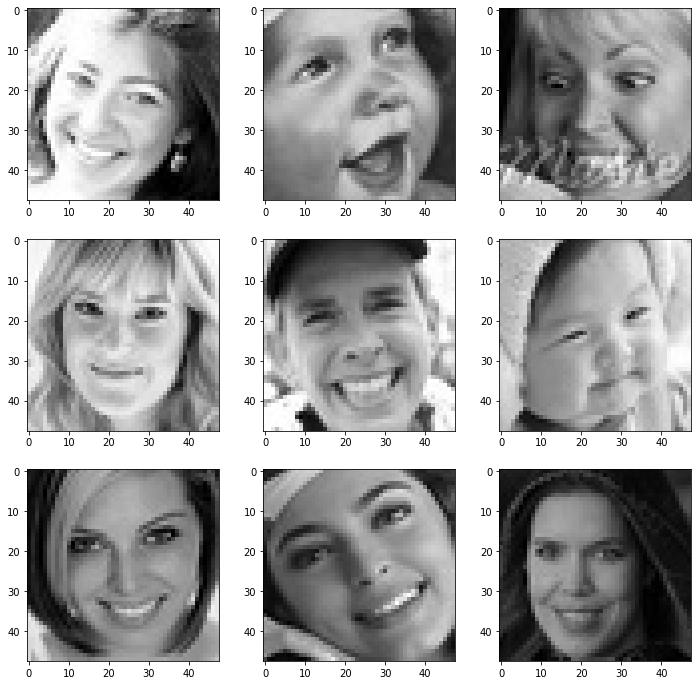

In [9]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

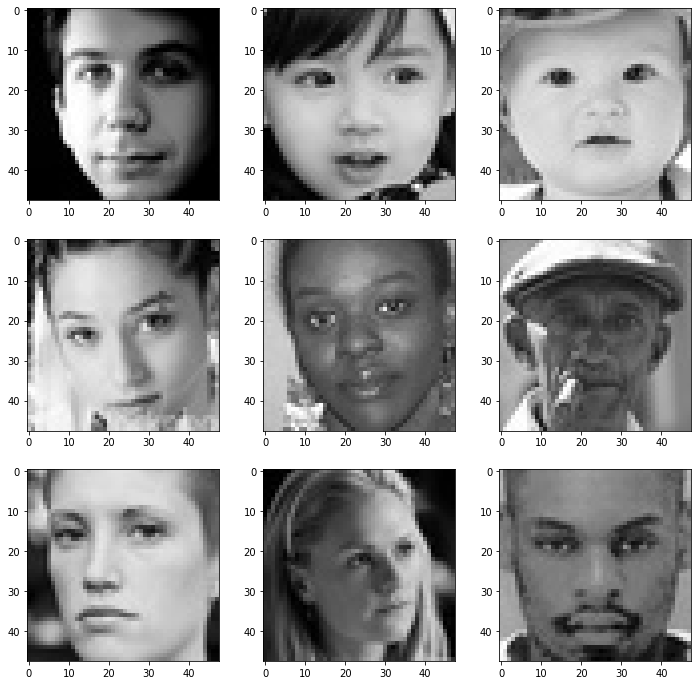

In [10]:
expression = 'neutral'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [11]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(folder_path+"train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"validation",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


Model Building

In [18]:
no_of_classes=3

model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#2nd CNN layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


In [19]:
#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

In [20]:
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [22]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-22-981791b505f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/48
18/18 [==============================] - ETA: 0s - loss: 1.2661 - accuracy: 0.3970

18/18 [==============================] - 228s 13s/step - loss: 1.2661 - accuracy: 0.3970 - val_loss: 8.3262 - val_accuracy: 0.4141 - lr: 0.0010
Epoch 2/48
18/18 [==============================] - ETA: 0s - loss: 1.1900 - accuracy: 0.4516

18/18 [==============================] - 95s 5s/step - loss: 1.1900 - accuracy: 0.4516 - val_loss: 5.5429 - val_accuracy: 0.2422 - lr: 0.0010
Epoch 3/48
18/18 [==============================] - ETA: 0s - loss: 1.0415 - accuracy: 0.5260

18/18 [==============================] - 97s 5s/step - loss: 1.0415 - accuracy: 0.5260 - val_loss: 4.2599 - val_accuracy: 0.3984 - lr: 0.0010
Epoch 4/48
18/18 [==============================] - ETA: 0s - loss: 0.9422 - accuracy: 0.5920

18/18 [==============================] - 99s 5s/step - loss: 0.9422 - accuracy: 0.5920 - val_loss: 3.2399 - val_accuracy: 0.4199 - lr: 0.0010
Epoch 5/48
18/18 [==============================] - ETA: 0s - loss: 0.8682 - accuracy: 0.6136

18/18 [==============================] - 99s 6s/step - loss: 0.8682 - accuracy: 0.6136 - val_loss: 2.6604 - val_accuracy: 0.4258 - lr: 0.0010
Epoch 6/48
18/18 [==============================] - ETA: 0s - loss: 0.8014 - accuracy: 0.6624

18/18 [==============================] - 96s 5s/step - loss: 0.8014 - accuracy: 0.6624 - val_loss: 1.2225 - val_accuracy: 0.5508 - lr: 0.0010
Epoch 7/48
18/18 [==============================] - ETA: 0s - loss: 0.7522 - accuracy: 0.6809

18/18 [==============================] - 97s 5s/step - loss: 0.7522 - accuracy: 0.6809 - val_loss: 1.2025 - val_accuracy: 0.4531 - lr: 0.0010
Epoch 8/48
18/18 [==============================] - ETA: 0s - loss: 0.7073 - accuracy: 0.6989

18/18 [==============================] - 95s 5s/step - loss: 0.7073 - accuracy: 0.6989 - val_loss: 1.0786 - val_accuracy: 0.5547 - lr: 0.0010
Epoch 9/48
18/18 [==============================] - ETA: 0s - loss: 0.6331 - accuracy: 0.7298

18/18 [==============================] - 98s 5s/step - loss: 0.6331 - accuracy: 0.7298 - val_loss: 0.8257 - val_accuracy: 0.6426 - lr: 0.0010
Epoch 10/48
18/18 [==============================] - ETA: 0s - loss: 0.5654 - accuracy: 0.7689

18/18 [==============================] - 98s 5s/step - loss: 0.5654 - accuracy: 0.7689 - val_loss: 0.8396 - val_accuracy: 0.6543 - lr: 0.0010
Epoch 11/48
18/18 [==============================] - ETA: 0s - loss: 0.5281 - accuracy: 0.7755

18/18 [==============================] - 95s 5s/step - loss: 0.5281 - accuracy: 0.7755 - val_loss: 0.8596 - val_accuracy: 0.6367 - lr: 0.0010
Epoch 12/48
18/18 [==============================] - ETA: 0s - loss: 0.4748 - accuracy: 0.8025Restoring model weights from the end of the best epoch: 9.



Epoch 12: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
18/18 [==============================] - 97s 5s/step - loss: 0.4748 - accuracy: 0.8025 - val_loss: 1.0218 - val_accuracy: 0.6465 - lr: 0.0010
Epoch 12: early stopping


In [23]:
model.save_weights('face_emotion_model.h5')

In [25]:
scores = model.evaluate(test_set)
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 6s 1s/step - loss: 0.8237 - accuracy: 0.6417
evaluate accuracy: 64.17%


In [26]:
scores = model.evaluate_generator(test_set)
print("%s%s: %.2f%%" % ("evaluate_generator ",model.metrics_names[1], scores[1]*100))

<ipython-input-26-d152e18af196>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_set)


evaluate_generator accuracy: 64.17%
